<a href="https://colab.research.google.com/github/RuchiraKolekar/Prediction-using-Deep-Learning/blob/main/ANN_for_Regression_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_excel('fake_reg (1).xlsx')
df

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851


In [ ]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


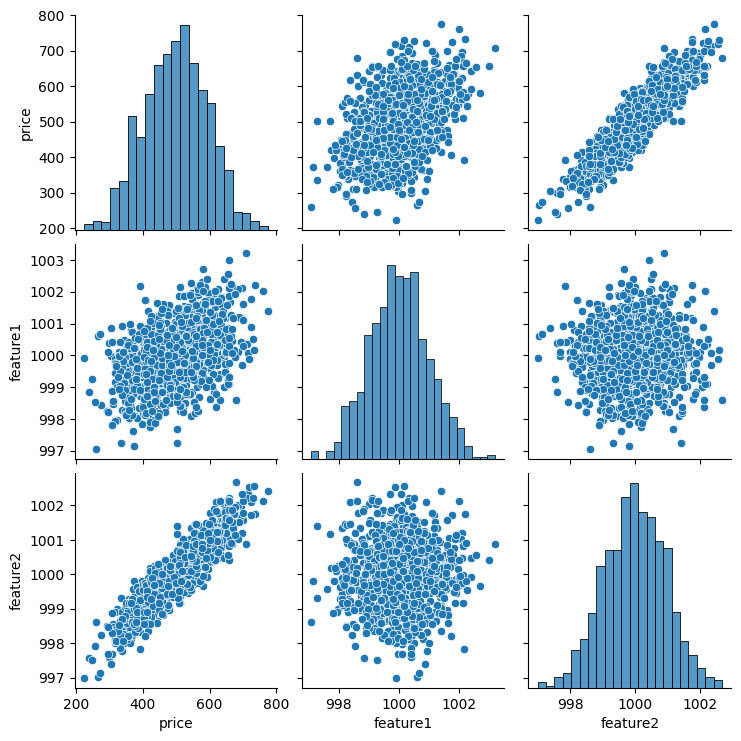

In [ ]:
sns.pairplot(data=df)

In [ ]:
df.corr()

,price,feature1,feature2
price,1.000000,0.444190,0.907576
feature1,0.444190,1.000000,0.030607
feature2,0.907576,0.030607,1.000000


In [ ]:
df.describe()


,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


<Axes: xlabel='price', ylabel='Count'>

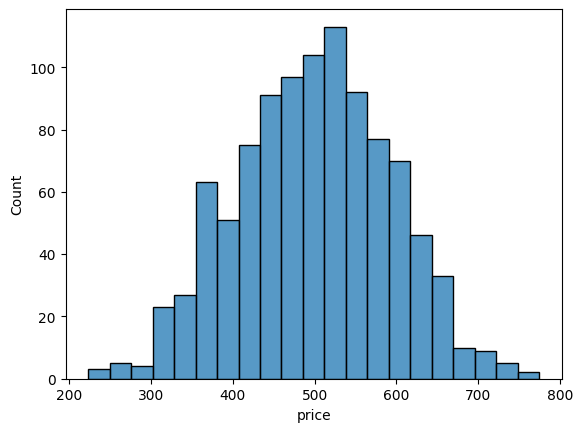

In [ ]:
sns.histplot(df["price"])

<Axes: xlabel='feature1', ylabel='Count'>

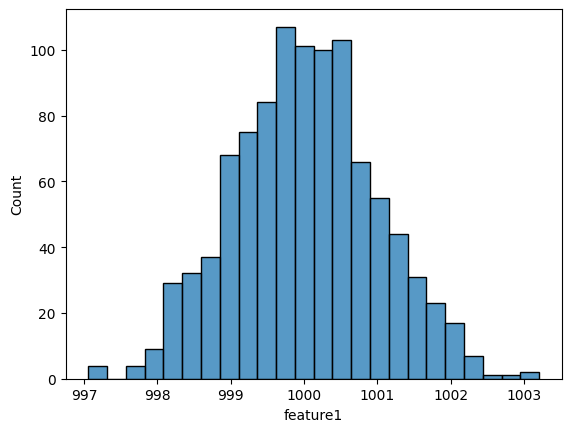

In [ ]:
sns.histplot(df["feature1"])


In [ ]:
#sep X and Y
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [ ]:
x=df.iloc[:,1:].values
x

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [ ]:
y=df["price"].values
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [ ]:
from sklearn.preprocessing import StandardScaler # as standardization is compulsory
sc=StandardScaler()
x=sc.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
ann=Sequential()   # making an object and adding 2 hidden layers
ann.add(Dense(units=4,activation="relu"))
ann.add(Dense(units=4,activation="relu"))

In [ ]:
ann.add(Dense(units=1))
# this is a output layer where we can write batch, but by default it is 32 and we are not writting any activation function as
# we dont need it as the problem is regression problem, so even if we write we mention activation function as
# 'linear' and by default the activation function is linear only.

In [ ]:
ann.compile(optimizer="adam", loss="mse")   # since this is regression problem we use loss i.e error as mean square root error
ann.fit(xtrain,ytrain,epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 255558.1094
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 255408.8281
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 255258.7500
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 255106.8125
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 254948.2969
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 254779.7188
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 254595.7188
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 254393.5469
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 254173.7188
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 253936.3438
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 253683.7656
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

In [ ]:
loss=ann.history.history  # if we want to show all the losses or all the accuracy, this will give me all losses or accuracies.
print(loss)

{'loss': [255558.109375, 255408.828125, 255258.75, 255106.8125, 254948.296875, 254779.71875, 254595.71875, 254393.546875, 254173.71875, 253936.34375, 253683.765625, 253413.21875, 253122.765625, 252809.78125, 252475.8125, 252113.828125, 251729.8125, 251315.984375, 250875.109375, 250404.875, 249904.734375, 249375.6875, 248807.21875, 248212.09375, 247580.9375, 246918.625, 246218.703125, 245483.859375, 244719.953125, 243903.84375, 243064.828125, 242179.0, 241262.375, 240305.234375, 239304.0, 238269.765625, 237194.15625, 236073.0, 234907.765625, 233715.640625, 232465.078125, 231182.75, 229851.65625, 228485.375, 227073.734375, 225616.546875, 224121.578125, 222576.0625, 220999.078125, 219359.21875, 217675.0625, 215945.671875, 214138.0625, 212266.453125, 210299.5, 208243.34375, 206061.875, 203798.90625, 201440.890625, 198983.3125, 196392.25, 193665.09375, 190820.1875, 187933.84375, 184971.578125, 181988.53125, 178961.5625, 175891.765625, 172776.375, 169644.859375, 166455.171875, 163238.828125,

In [ ]:
loss_df=pd.DataFrame(loss)  # the above give losses in a dictionary so we convert it into a df

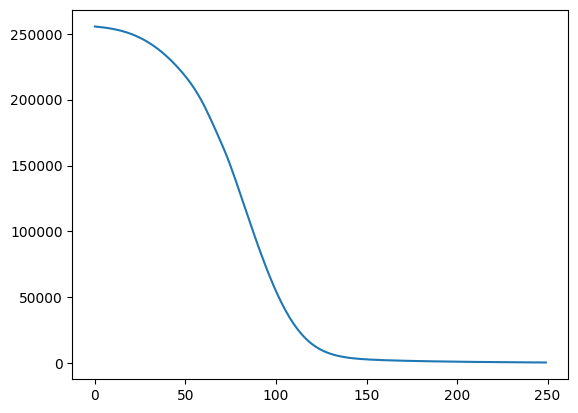

In [ ]:
plt.plot(loss_df['loss'])
#after a point of 120 epoch we have almost same error which means rest 130 epoch we are doing extra which will lead to overfitting problem
# as the model will learn that much time of our data.

In [ ]:
ypred=ann.predict(xtest) # passed xtest to check ypred

10/10 [==============================] - 0s 4ms/step


In [ ]:
ypred

array([[475.3745 ],
       [525.36975],
       [498.45328],
       [530.19696],
       [662.0575 ],
       [353.40628],
       [374.29727],
       [367.94748],
       [725.37   ],
       [489.14694],
       [481.5383 ],
       [506.9777 ],
       [498.19437],
       [357.9896 ],
       [549.0928 ],
       [491.99545],
       [578.1261 ],
       [550.88385],
       [484.13513],
       [497.8427 ],
       [450.91873],
       [603.5314 ],
       [437.1375 ],
       [582.57635],
       [419.62668],
       [522.5238 ],
       [378.49026],
       [500.87936],
       [543.2598 ],
       [365.6874 ],
       [440.21872],
       [635.1726 ],
       [561.7991 ],
       [539.0804 ],
       [612.25806],
       [530.09375],
       [399.18817],
       [575.60535],
       [588.6055 ],
       [509.7938 ],
       [418.47964],
       [721.8122 ],
       [525.1468 ],
       [531.194  ],
       [503.12943],
       [454.45517],
       [514.7367 ],
       [527.6089 ],
       [590.3117 ],
       [464.26822],


In [ ]:
pd.DataFrame({"Actual value":ytest,"predicted value":ypred.flatten()})
# to compare ypred and ytest


,Actual value,predicted value
0,489.057552,475.374512
1,526.210746,525.369751
2,518.360395,498.453278
3,552.778935,530.196960
4,649.395917,662.057495
...,...,...
295,530.276259,532.960815
296,481.645813,474.326080
297,460.694781,458.257385
298,518.263124,515.527039


In [ ]:
from sklearn.metrics import r2_score  # to check the accuracy we use r2 score as regression problem
r2_score(ytest,ypred)


0.9622714107547792

In [ ]:
newdata=[[900,950]]  # passing new values to check the model
nd=sc.fit_transform(newdata)
ann.predict(nd)

1/1 [==============================] - 0s 40ms/step


array([[493.95724]], dtype=float32)

In [ ]:
# 2 reasons overfitting occurs
#1. no. of epochs if high as above--- to solve this we need to find the best epoch no. so for this we will focus on testing error(or validation
# loss) and to check whether it is getting updated evrytime if not than we stop..this is caled early stop. even if we have negligible loss we
# dont consider it as as updated loss but computer considers it update so we give a upadted value.
#2. a single neuron learns the data x no. of epochs--- to solve this we do not consider all neurons in each epoch, so we assign a paricular
# percent of neuron ineach epoch where a single neuron may not be active in other neuron to stop overfitting, so this randonly dropping of
# neuron we use a layer called drop out layer, where we drop a particular no. of neuron in epoch.


Too many epochs can lead to overfitting of the training dataset, whereas too few may result in an underfit model. Early stopping is a method that allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset.

The model tries to chase the loss function crazily on the training data, by tuning the parameters. Now, we keep another set of data as the validation set and as we go on training, we keep a record of the loss function on the validation data, and when we see that there is no improvement on the validation set, we stop, rather than going all the epochs. This strategy of stopping early based on the validation set performance is called Early Stopping.

the number of epochs on which we would like to see no improvement. This can be done by setting the “patience” argument.

By default, any change in the performance measure, no matter how fractional, will be considered an improvement. You may want to consider an improvement that is a specific increment, such as 1 unit for mean squared error or 1% for accuracy. This can be specified via the “min_delta” argument.